<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/TP21%203.2%20SSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import random, numpy
from numpy.random import seed

SEED = 12345

In [3]:
df = pd.read_excel('Data for NN SSE.xlsx')
df.index = pd.to_datetime(df.Date)
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,,,,
2003-03-04,-0.000773,0.008621,0.100693,0.010495,0.002656,0.004509,-0.090909,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,0
2003-03-05,-0.004674,0.002646,0.094398,-0.002208,-0.003680,-0.006330,-0.150000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2003-03-06,-0.012415,-0.010148,0.021469,-0.004905,-0.004445,-0.009289,0.235294,-1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,0
2003-03-07,-0.003504,-0.012460,0.022722,-0.013785,-0.009833,-0.003250,-0.166667,-1,-1,-1,1,-1,1,1,1,1,1,1,-1,1,-1,0
2003-03-10,-0.016191,-0.037079,-0.011241,-0.002330,-0.004169,-0.014600,0.057143,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1


In [4]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.75, random_state=42, shuffle=False)

In [5]:
X_train.tail()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-31,0.003517,-0.000126,0.019020,0.000481,0.001528,-0.000840,0.007123,-1,1,1,1,1,1,1,1,1,1,1,1,-1,1
2016-09-01,-0.007190,-0.001637,0.007995,0.003594,0.000326,-0.000170,0.097595,-1,1,1,1,-1,1,1,1,1,1,1,-1,1,1
2016-09-02,0.001321,-0.000963,0.018101,-0.008582,-0.005238,-0.004043,-0.030928,-1,1,1,1,-1,1,1,1,1,1,1,-1,1,1
2016-09-05,0.001546,0.000674,0.018657,0.004321,0.004218,0.004864,-0.035904,-1,1,1,1,-1,1,1,1,1,1,1,-1,1,1
2016-09-06,0.006060,0.005215,0.013293,0.000113,0.003249,-0.003961,0.192414,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1


In [6]:
X_valid.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-07,0.000393,0.002086,0.033399,0.006602,0.003285,0.011363,0.081550,1,1,1,1,1,1,1,1,1,1,1,1,-1,1
2016-09-08,0.001302,0.010658,0.033941,-0.000445,-0.002864,-0.001288,-0.219786,1,1,1,1,1,1,1,1,1,1,1,1,-1,1
2016-09-09,-0.005523,0.003750,0.033402,0.001772,0.001617,-0.001843,0.101439,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1
2016-09-12,-0.018474,-0.016314,0.023225,-0.018711,-0.019614,-0.025433,0.281892,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1
2016-09-13,0.000507,-0.021743,0.017579,-0.004106,-0.003693,0.002937,-0.342718,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1


In [7]:
y_train

Date
2003-03-04    0
2003-03-05    0
2003-03-06    0
2003-03-07    0
2003-03-10    1
             ..
2016-08-31    0
2016-09-01    1
2016-09-02    1
2016-09-05    1
2016-09-06    1
Name: Y, Length: 3284, dtype: int64

In [8]:
y_valid

Date
2016-09-07    1
2016-09-08    0
2016-09-09    0
2016-09-12    1
2016-09-13    0
             ..
2021-03-10    1
2021-03-11    1
2021-03-12    0
2021-03-15    1
2021-03-16    0
Name: Y, Length: 1095, dtype: int64

In [9]:
input_shape = [X_train.shape[1]]
input_shape

[21]

In [10]:
def neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  return (history.history['binary_accuracy'][-1])

In [ ]:
i = 0
accuracy_list = []
for dropout_include in [True, False]:
  for batch in [64, 128, 256, 512, 1024]:
    for nodes_first in [4, 8, 16, 32]:
      for nodes_second in [4, 8, 16, 32]:
        if dropout_include == True:
          for rate__ in [0.2, 0.3, 0.4, 0.5]:
            acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i, rate_=rate__)
            i=i+1
            accuracy_list.append(acc)
        else:
          acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i)
          i=i+1
          accuracy_list.append(acc)

model 0: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5207064747810364
model 1: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5292326211929321
model 2: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5298416614532471
model 3: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5243605375289917
model 4: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.536845326423645
model 5: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5207064747810364
model 6: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5228379964828491
model 7: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5249695777893066
model 8: nodes_first= 4, nodes_second=16, batch=6

In [ ]:
sorted(range(len(accuracy_list)), key=lambda x: accuracy_list[x])[-5:]

[383, 346, 333, 350, 349]

# Top-3 models

model 349: nodes_first= 32, nodes_second=8, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5618148446083069

model 350: nodes_first= 32, nodes_second=16, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5615103244781494

model 333: nodes_first= 32, nodes_second=8, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5612058639526367

In [11]:
def neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", colormap='bwr')

  history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy", colormap='bwr')

  plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

model 349: nodes_first= 32, nodes_second=8, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5618148446083069


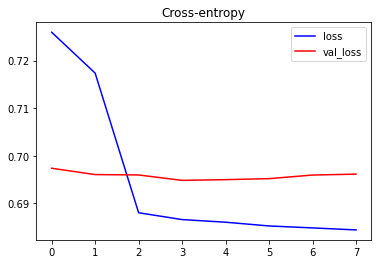

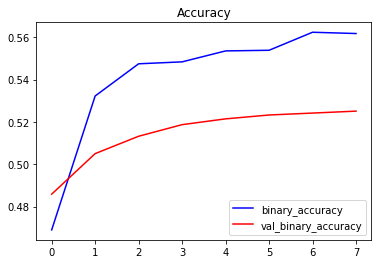

In [12]:
# model 349: nodes_first= 32, nodes_second=8, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5618148446083069

# model 350: nodes_first= 32, nodes_second=16, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5615103244781494

# model 333: nodes_first= 32, nodes_second=8, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5612058639526367

neural_network_analysis(32, 8, 128, False, SEED, X_train, y_train, X_valid, y_valid, 349)

model 350: nodes_first= 32, nodes_second=16, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5615103244781494


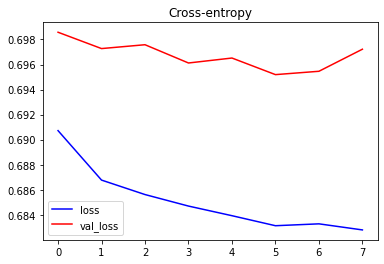

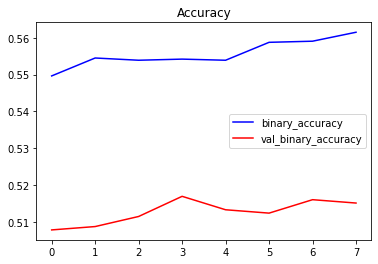

In [13]:
neural_network_analysis(32, 16, 128, False, SEED, X_train, y_train, X_valid, y_valid, 350)

model 333: nodes_first= 32, nodes_second=8, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5612058639526367


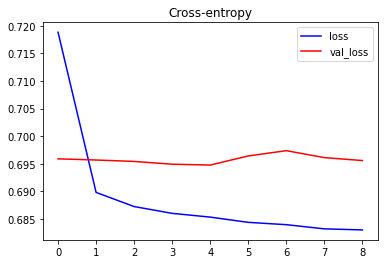

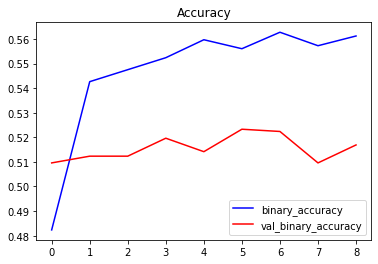

In [14]:
neural_network_analysis(32, 8, 64, False, SEED, X_train, y_train, X_valid, y_valid, 333)